In [1]:
#imports we have already seen
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#new imports we will learn to use
import statsmodels.api as sm # for the statistical analysis to find out if the TS is stationary
import glob #to sort files
from pandas.plotting import scatter_matrix #will make useful correlatin plots
import json #reads and writes json files, see programmatic data access notebooks
import os #this runs system level commands, see programmatic data access notebooks

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#some annoying wornings show up - suppress them with this
import warnings
warnings.filterwarnings('ignore')

In [4]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

# data ingestion

use kaggle economic data accessing it programmatically at
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt

Access it programmatically as was done for the TESLA data in https://github.com/fedhere/MLTSA22_FBianco/blob/main/Lab3ProgrammaticDataAccess/Kaggledata_load.ipynb

Save it in a directory called MLTSA22/HW2/data in your google drive 


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # this is because my drive is refusing to update

Mounted at /content/drive


In [6]:
cd /content/drive/MyDrive/MLTSA22/HW2/

/content/drive/MyDrive/MLTSA22/HW2


In [7]:
#use glob.glob to list the files in Data/Stocks. 
#This command returns a list, turn it into an array with np.array(<list>)
#Sort the array (alphabetically) with np.sort
allfiles = np.sort(np.array(glob.glob("Data/Stocks/*.txt")))
print(allfiles[:10])

['Data/Stocks/a.us.txt' 'Data/Stocks/aa.us.txt' 'Data/Stocks/aaap.us.txt'
 'Data/Stocks/aaba.us.txt' 'Data/Stocks/aac.us.txt'
 'Data/Stocks/aal.us.txt' 'Data/Stocks/aamc.us.txt'
 'Data/Stocks/aame.us.txt' 'Data/Stocks/aan.us.txt'
 'Data/Stocks/aaoi.us.txt']


# read in the first 10 files in Data/Stock (first in alphabetical order.)

each file can be read with ```pd.read_csv()```

merge each file so that you end up with a single dataframe (e.g. call it tss)

```df1 = pd.read_csv()```

```df2 = pd.read_csv()```

```newdf = df.merge(df2)```

you want to merge on the date: this means the resulting dataframe will have a row for each date that is available in both files and all the columns of the files you are merging. To achieve this pass the argument ```on="Date"``` to ```df.merge()```

I also recommand you turn the Date column into the dataframe index

```tss.set_index("Date", inplace=True)```

In [8]:
#files paths are stored in the allfiles variable sorted alphabetically...
pd.read_csv(allfiles[0])

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-11-18,30.713,33.754,27.002,29.702,66277506,0
1,1999-11-19,28.986,29.027,26.872,27.257,16142920,0
2,1999-11-22,27.886,29.702,27.044,29.702,6970266,0
3,1999-11-23,28.688,29.446,27.002,27.002,6332082,0
4,1999-11-24,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...,...
4516,2017-11-06,68.220,68.450,68.220,68.220,995731,0
4517,2017-11-07,68.320,68.640,68.040,68.250,966466,0
4518,2017-11-08,68.100,68.330,67.771,68.110,972616,0
4519,2017-11-09,67.920,67.980,66.910,67.470,1673083,0


In [9]:
# merged dataframes are stored into a single dataframe called tss. Inspect it as discussed

In [10]:
tss = pd.read_csv(allfiles[0])[["Date", "Close"]]
tss = tss.rename(columns={"Close":allfiles[0][12:-4]})
for i in range(1,10):
  tmp_df = pd.read_csv(allfiles[i])[["Date", "Close"]]
  tss = tss.merge(tmp_df, on="Date")
  tss = tss.rename(columns={"Close":allfiles[i][12:-4]})
tss.set_index("Date", inplace=True)

In [11]:
tss.head()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
Date,,,,,,,,,,
2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68


In [12]:
tss.tail()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
Date,,,,,,,,,,
2017-11-02,68.13,47.46,81.00,70.51,10.02,47.257,88.00,3.65,35.80,39.28
2017-11-03,68.37,47.12,80.99,70.23,10.08,47.346,80.40,3.60,36.43,37.82
2017-11-07,68.25,46.97,81.00,72.22,11.07,46.358,81.00,3.40,34.44,37.89
2017-11-09,67.47,43.33,81.00,70.19,10.88,45.670,84.05,3.50,35.62,43.20
2017-11-10,66.81,43.01,80.98,70.56,11.28,45.820,80.10,3.50,36.59,45.30


In [13]:
tss.shape

(447, 10)

#  data inspection

plot each time series (ts)

In [14]:
tss.iloc[0], tss.iloc[-1] 

(a.us       36.901
 aa.us      17.779
 aaap.us    24.500
 aaba.us    33.380
 aac.us     22.560
 aal.us     43.524
 aamc.us    20.750
 aame.us     4.796
 aan.us     24.649
 aaoi.us    16.760
 Name: 2015-11-11, dtype: float64, a.us       66.81
 aa.us      43.01
 aaap.us    80.98
 aaba.us    70.56
 aac.us     11.28
 aal.us     45.82
 aamc.us    80.10
 aame.us     3.50
 aan.us     36.59
 aaoi.us    45.30
 Name: 2017-11-10, dtype: float64)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


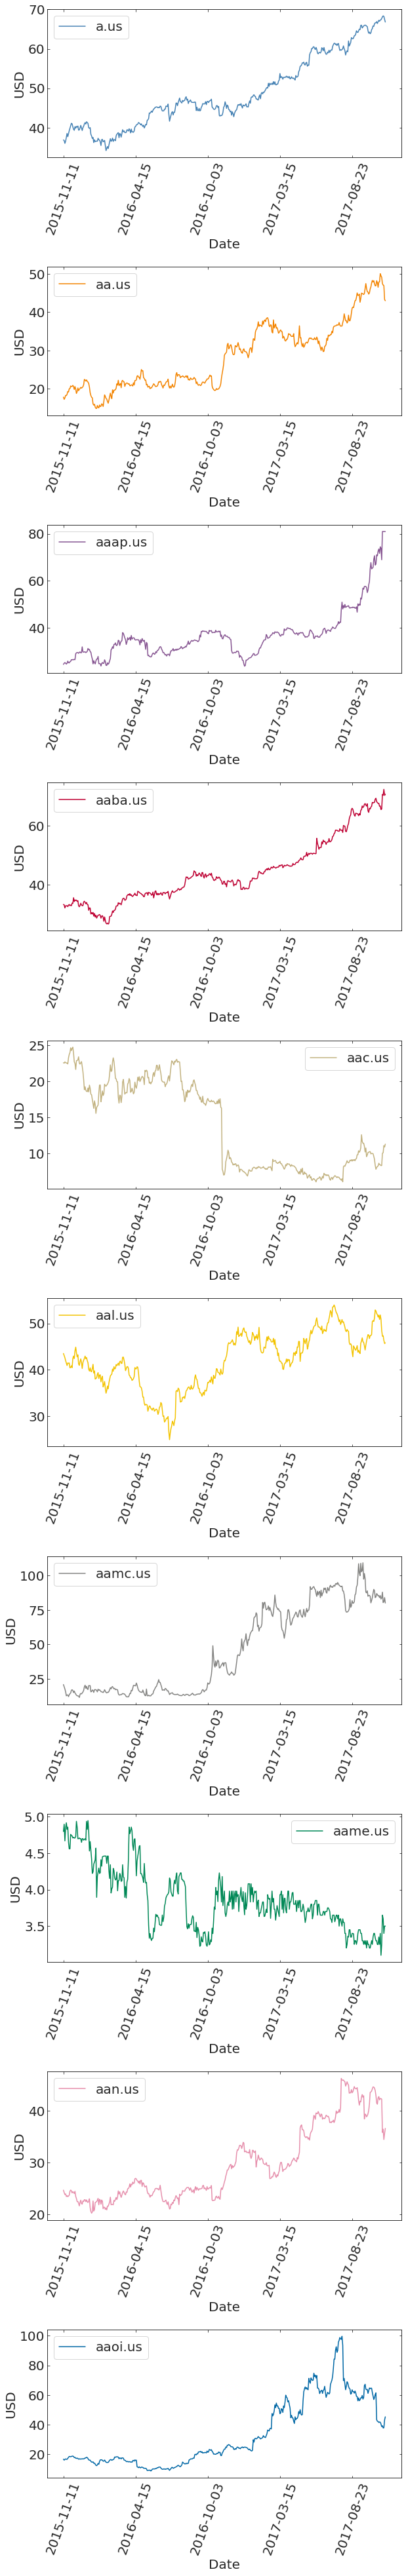

In [15]:
# plot the 10 time series individually since they are only 10
tss.plot(subplots=True, figsize=(9,55), sharex=False, ylabel="USD", rot=70) # dataframe has a plotting function that is just shorthand for matplotlib plotting
pl.tight_layout() # this adds a nice margin so that the dates do not get overlapped
pl.show()

Fig 1: Plots of daily stock closings from 11/11/2015 to 08/23/2017 for the first 10 companies of [this stock market dataset](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data). The initials for each company are listed in the legends.

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


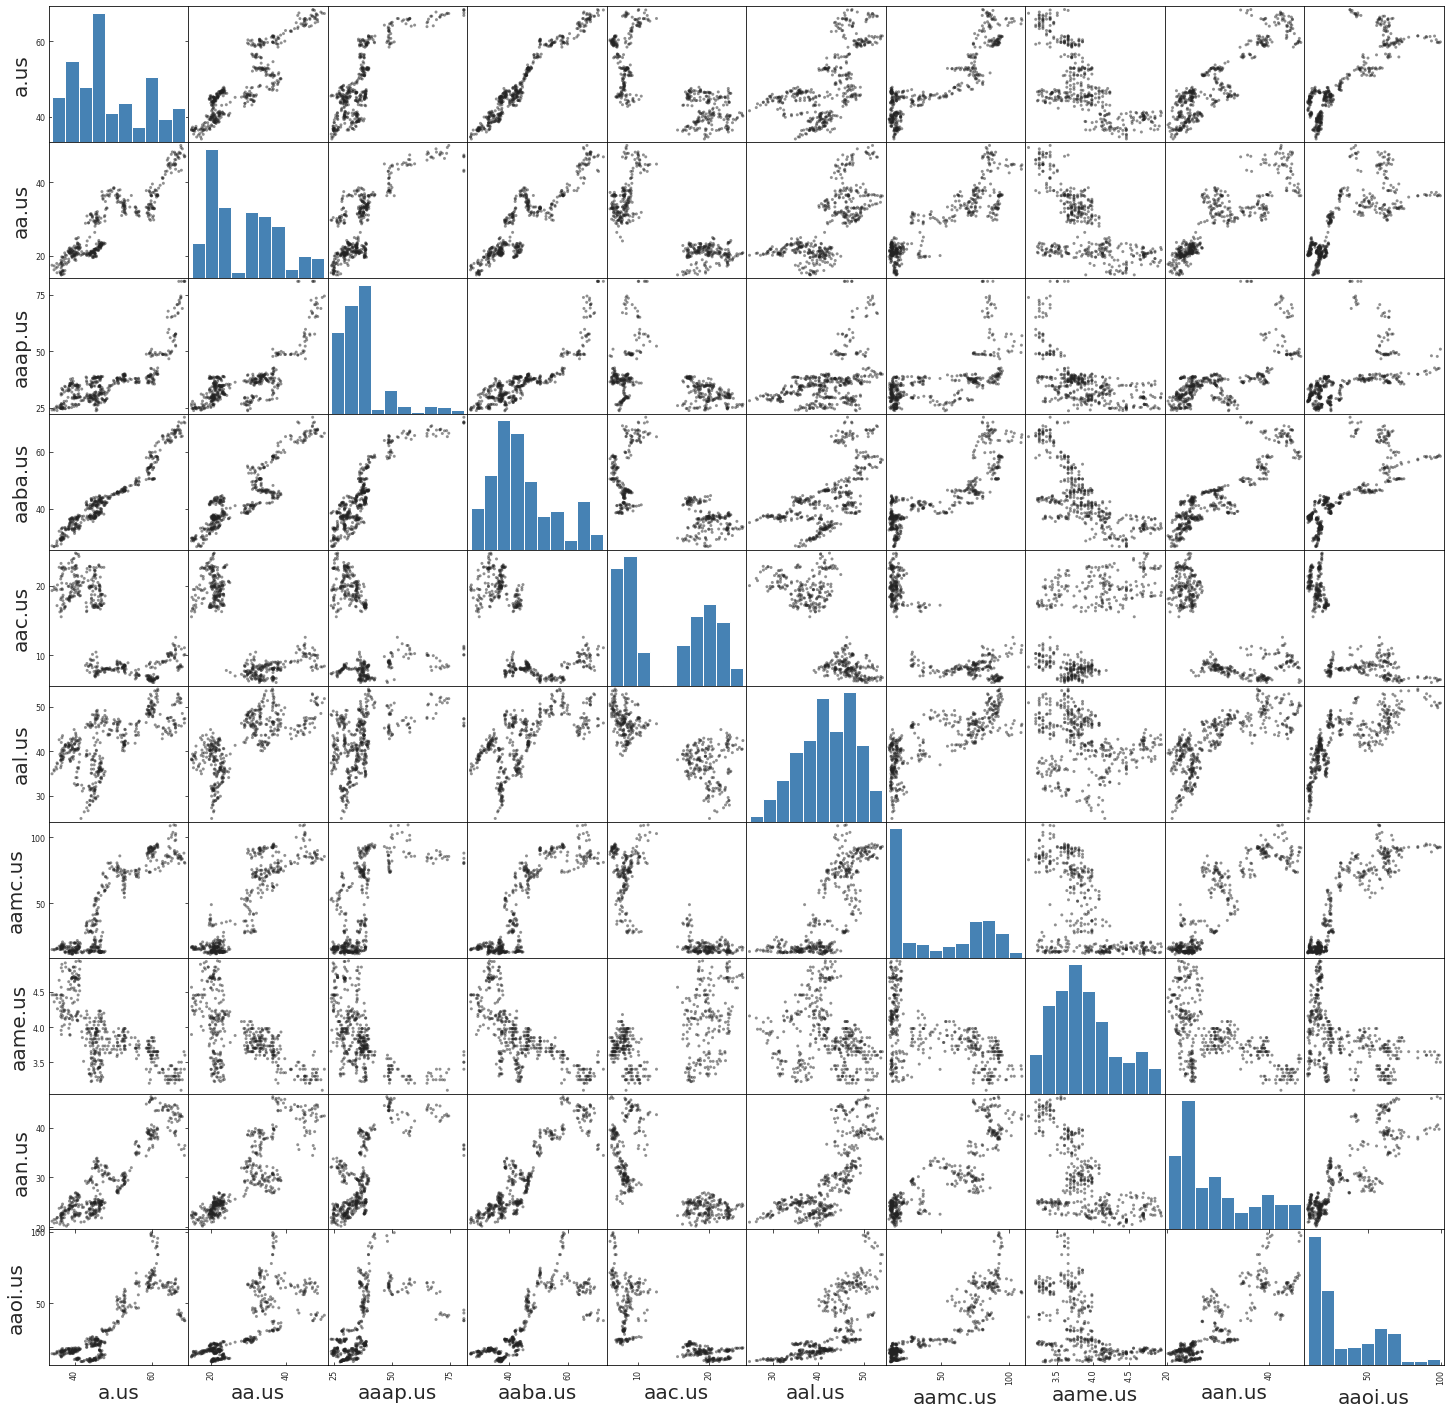

In [ ]:
scatter_matrix(tss, figsize=(25,25), color="#222222");

Fig 2: Scatter matrix of same stocks from Figure 1. The stocks are plotted against each other to show the linear correlation between two stocks.

In [ ]:
print("Correlation matrix of 2015-2017 stock values")
tss.corr()

Correlation matrix of 2015-2017 stock values


,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


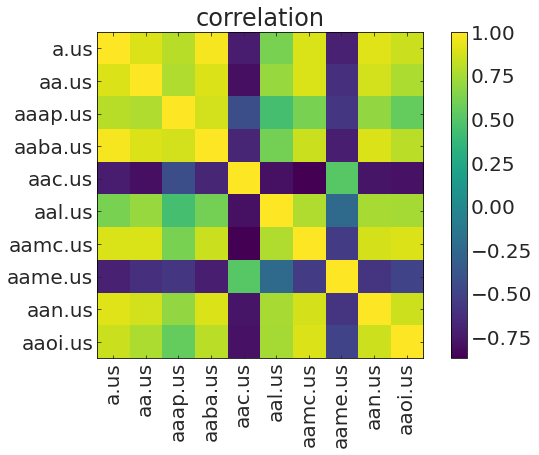

In [ ]:
# you can visualize it as a heat map with imshow
pl.imshow(tss.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns);

Fig 3: Similar to Figure 2, but with the correlation calculated between every set of 2 stocks. Yellow is high correlation and purple is no correlation.

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

You will have to set a statistival threshold - choose 2-sigma. What fraction of a gaussian distribution is not contained inside of 2-sigma? this is the threshold you want to pass

In [16]:
threshold = .05 # 5% is not within 2-sigma
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for f in tss.columns:
  res = sm.tsa.stattools.adfuller(tss[f])
  print(f"{f} is stationary: {res[1] < threshold}")

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False
